In [1]:
from evaluate import get_nan_percent, get_performance, tolerant_mean

from os.path import join as pjoin 
from os import listdir

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

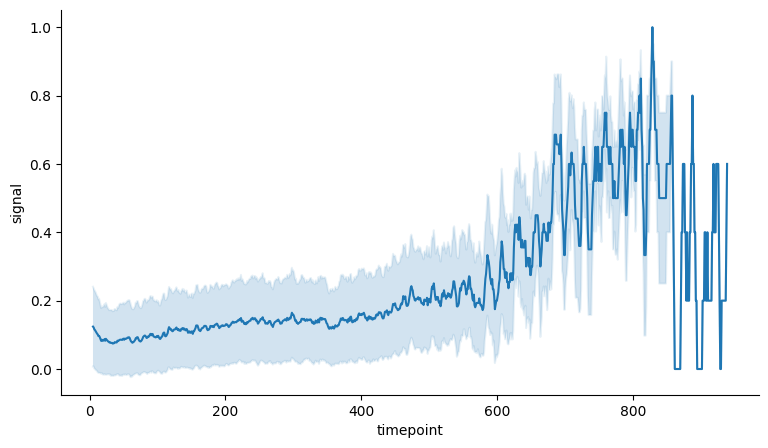

In [7]:
bookkeeping_path = ('session_info.csv')

mouse_code = []
date = []
version = []
performance = []

nan_percents = []

for mice_code in listdir('data'):
    mice_path = pjoin('data', mice_code)

    for session in listdir(mice_path):
        session_path = pjoin(mice_path, session)
        session_data = pd.read_csv(session_path)
        leftP = session_data['leftP']
        choices = session_data['choices']
        nan_percents.append(get_nan_percent(choices=choices))
    mouse_data = pd.DataFrame()
        
y, error = tolerant_mean(nan_percents)
error = error / 2
lower = y - error
upper = y + error
x = np.arange(5, len(y) + 5)


# Draw plot with error band and extra formatting to match seaborn style
fig, ax = plt.subplots(figsize=(9,5))
ax.plot(x, y, label='signal mean')
ax.plot(x, lower, color='tab:blue', alpha=0.1)
ax.plot(x, upper, color='tab:blue', alpha=0.1)
ax.fill_between(x, lower, upper, alpha=0.2)
ax.set_xlabel('timepoint')
ax.set_ylabel('signal')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()